In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('JaponicaIndex.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [3]:

# df.to_csv('JaponicaIndex.csv')

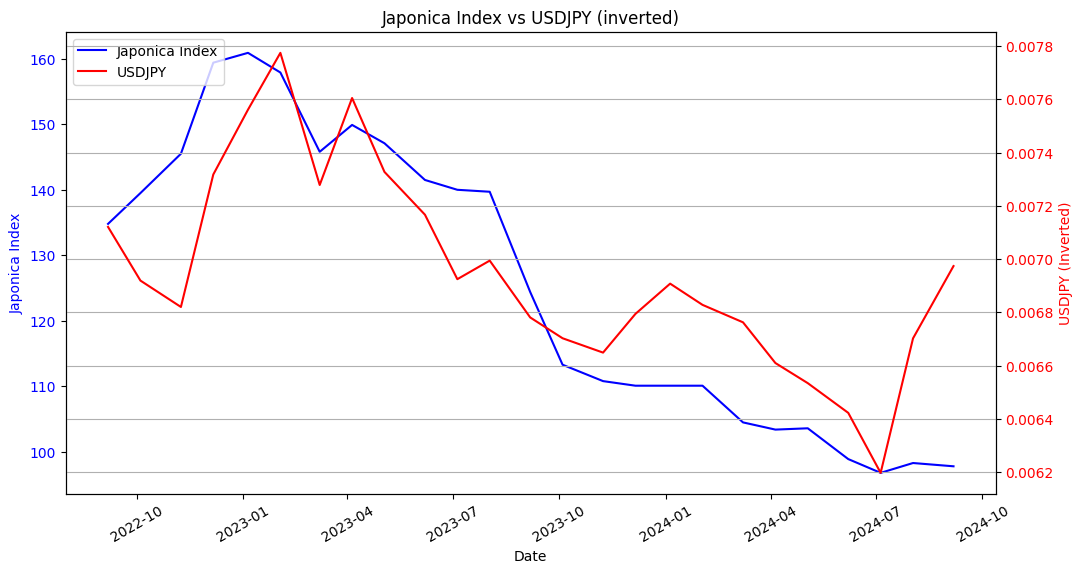

In [4]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df.index, df['Japonica Index'], color='b', label='Japonica Index')
ax1.set_xlabel('Date')
ax1.set_ylabel('Japonica Index', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df.index, 1/df['USDJPY'], color='r', label='USDJPY')
ax2.set_ylabel('USDJPY (Inverted)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax1.tick_params(axis='x', labelrotation=30)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Display the plot
plt.title('Japonica Index vs USDJPY (inverted)')
plt.grid()
plt.show()

In [ ]:
rho, p = pearsonr(df['Japonica Index'].diff().dropna(), df['USDJPY'].diff().dropna())
print(f'Pearson coefficient: {rho}\nP-value: {p}')
if p < 0.05:
    print('Null hypothesis can be rejected on this basis.')

In [10]:
import yfinance as yf

In [ ]:
usdjpy = yf.Ticker("JPY=X")

start_date = min(df.index).strftime('%Y-%m-%d')
end_date = max(df.index).strftime('%Y-%m-') + '20'

ccy_data = yf.download("JPY=X", start=start_date, end=end_date)
ccy_data


In [ ]:
for d in df.index:
    ds = d.strftime('%Y-%m-%d')
    print(df.loc[d, 'USDJPY'], ds)
    df.loc[d, 'USDJPY'] = round(ccy_data.loc[ds, 'Close'],2)
   